In [2]:
!pip install arch

     -------------------------------------- 922.8/922.8 kB 1.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

In [5]:
df1=pd.read_csv("iaq_middle5.csv")
df1["TempeChange"]=df1.Temp.pct_change(1).mul(100)
df1=df1.iloc[1:]

In [6]:
#df1.Time=pd.to_datetime(df1.Time,dayfirst="True")
#df1.set_index("Time",inplace=True)
#df1.asfreq('h')
df1.head()

,Time,Temp,Pressure,Humidnity,IAQ,TempeChange
1,14/10/2023 20:05,33.71,100177,66.11,89.11,0.029674
2,14/10/2023 20:06,33.86,100180,65.20,89.51,0.444972
3,14/10/2023 20:07,34.22,100181,64.18,89.94,1.063201
4,14/10/2023 20:08,34.82,100182,62.90,90.36,1.753361
5,14/10/2023 20:09,34.91,100183,62.28,90.74,0.258472


In [7]:
df1.head()

,Time,Temp,Pressure,Humidnity,IAQ,TempeChange
1,14/10/2023 20:05,33.71,100177,66.11,89.11,0.029674
2,14/10/2023 20:06,33.86,100180,65.20,89.51,0.444972
3,14/10/2023 20:07,34.22,100181,64.18,89.94,1.063201
4,14/10/2023 20:08,34.82,100182,62.90,90.36,1.753361
5,14/10/2023 20:09,34.91,100183,62.28,90.74,0.258472


In [8]:
df1.tail()

,Time,Temp,Pressure,Humidnity,IAQ,TempeChange
1398,15/10/2023 19:22,33.83,100108,56.53,93.13,0.296472
1399,15/10/2023 19:23,34.13,100109,56.16,93.25,0.886787
1400,15/10/2023 19:24,34.16,100111,55.81,93.45,0.087899
1401,15/10/2023 19:25,34.18,100114,56.22,93.24,0.058548
1402,15/10/2023 19:26,33.86,100118,56.72,93.07,-0.936220


In [9]:
mod_garch=arch_model(df1.TempeChange,vol="GARCH",p=1,q=1,mean="constant",dist="Normal")
result=mod_garch.fit(update_freq=10)


Iteration:     10,   Func. Count:     61,   Neg. LLF: 1641.02329367204
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1641.02329367204
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            TempeChange   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1641.02
Distribution:                  Normal   AIC:                           3290.05
Method:            Maximum Likelihood   BIC:                           3311.03
                                        No. Observations:                 1402
Date:                Sun, Oct 15 2023   Df Residuals:                     1401
Time:                        21:44:38   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.7342e-03  1.933e-02      0.141      0.888 [-3.516e-02,4.063e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0528      0.159      0.332      0.740 [ -0.259,  0.365]
alpha[1]       0.0667      0.118      0.566      0.572 [ -0.164,  0.298]
beta[1]        0.8486      0.371      2.288  2.214e-02 [  0.122,  1.576]
========================================================================

Covariance estimator: robust
"""

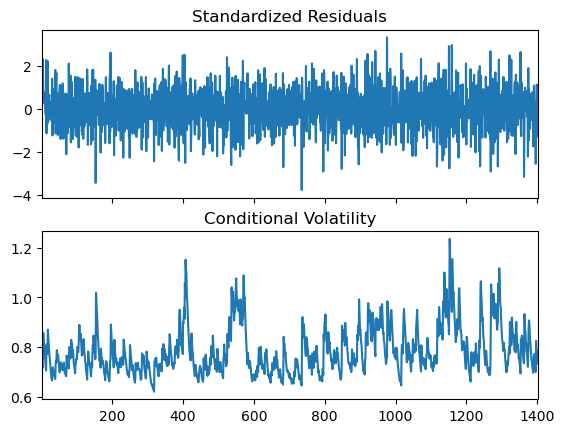

In [11]:
result.plot()
plt.show()